In [14]:
# Imports principais
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [25]:
# Caminho do arquivo original
FILE_PATH_PRODUCTS = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetRaw/OlistDatasets/olist_products_dataset.csv"

# Caminho para salvar a versão processada
OUTPUT_DIR = "/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetProcessed/OlistDatasets/"
OUTPUT_FILE = os.path.join(OUTPUT_DIR, "olist_products_dataset_auxiliar.csv")

# Ler dataset original
products_dataset = pd.read_csv(FILE_PATH_PRODUCTS)

# Tratar valores nulos na categoria
products_dataset['product_category_name'] = products_dataset['product_category_name'].fillna('unknown')

# Gerar IDs únicos e tabela de dimensão
unique_categories = sorted(products_dataset['product_category_name'].unique())
category_map = {cat: idx for idx, cat in enumerate(unique_categories, start=1)}

# Cria a coluna numérica
products_dataset['product_category_id'] = products_dataset['product_category_name'].map(category_map)

# Cria a tabela auxiliar de categorias (dimensão)
product_category_dim = (
    pd.DataFrame(list(category_map.items()), columns=['product_category_name', 'product_category_id'])
    .sort_values('product_category_id')
    .reset_index(drop=True)
)
# Salvar resultados
os.makedirs(OUTPUT_DIR, exist_ok=True)
products_dataset.to_csv(OUTPUT_FILE, index=False)


In [26]:
# Caminho do arquivo original
FILE_PATH_PAYMENTS = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetRaw/OlistDatasets/olist_order_payments_dataset.csv"

# Caminho para salvar a versão processada
OUTPUT_DIR = "/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetProcessed/OlistDatasets/"
OUTPUT_FILE = os.path.join(OUTPUT_DIR, "olist_order_payments_dataset_auxiliar.csv")

# Ler dataset original
payments_dataset = pd.read_csv(FILE_PATH_PAYMENTS)

# Tratar valores nulos na categoria
payments_dataset['payment_type'] = payments_dataset['payment_type'].fillna('unknown')

# Gerar IDs únicos e tabela de dimensão
unique_categories = sorted(payments_dataset['payment_type'].unique())
category_map = {cat: idx for idx, cat in enumerate(unique_categories, start=1)}

# Cria a coluna numérica
payments_dataset['payment_type_id'] = payments_dataset['payment_type'].map(category_map).astype(int)

# Cria a tabela auxiliar de categorias (dimensão)
payment_type_dim = (
    pd.DataFrame(list(category_map.items()), columns=['payment_type', 'payment_type_id'])
    .sort_values('payment_type_id')
    .reset_index(drop=True)
)
# Salvar resultados
os.makedirs(OUTPUT_DIR, exist_ok=True)
payments_dataset.to_csv(OUTPUT_FILE, index=False)

In [27]:
FILE_PATH_CUSTOMERS = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetRaw/OlistDatasets/olist_customers_dataset.csv"
FILE_PATH_GEOLOCATION = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetRaw/OlistDatasets/olist_geolocation_dataset.csv"
FILE_PATH_ORDERS = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetRaw/OlistDatasets/olist_orders_dataset.csv"
FILE_PATH_ORDER_ITEMS = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetRaw/OlistDatasets/olist_order_items_dataset.csv"
FILE_PATH_PRODUCTS = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetProcessed/OlistDatasets/olist_products_dataset_auxiliar.csv"
FILE_PATH_SELLERS = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetRaw/OlistDatasets/olist_sellers_dataset.csv"
FILE_PATH_REVIEWS = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetRaw/OlistDatasets/olist_order_reviews_dataset.csv"
FILE_PATH_CATEGORY_NAME_TRANSLATION = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetRaw/OlistDatasets/product_category_name_translation.csv"
FILE_PATH_PAYMENTS = r"/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetProcessed/OlistDatasets/olist_order_payments_dataset_auxiliar.csv"

In [28]:
# Leitura do csv
customers_dataset = pd.read_csv(FILE_PATH_CUSTOMERS)
geolocation_dataset = pd.read_csv(FILE_PATH_GEOLOCATION)
order_itens_dataset = pd.read_csv(FILE_PATH_ORDER_ITEMS)
orders_dataset = pd.read_csv(FILE_PATH_ORDERS)
products_dataset = pd.read_csv(FILE_PATH_PRODUCTS)
sellers_dataset = pd.read_csv(FILE_PATH_SELLERS)
reviews_dataset = pd.read_csv(FILE_PATH_REVIEWS)
category_name_translation = pd.read_csv(FILE_PATH_CATEGORY_NAME_TRANSLATION)
payments_dataset = pd.read_csv(FILE_PATH_PAYMENTS)


In [29]:
df = (orders_dataset
        .merge(order_itens_dataset, on='order_id')
        .merge(products_dataset, on='product_id')
        .merge(customers_dataset, on='customer_id')
        .merge(sellers_dataset, on='seller_id')
    )


In [30]:
df = df.merge(payments_dataset, on='order_id', how='left')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,payment_type_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,sao paulo,SP,9350,maua,SP,1.0,credit_card,1.0,18.12,2.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,sao paulo,SP,9350,maua,SP,3.0,voucher,1.0,2.00,5.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,sao paulo,SP,9350,maua,SP,2.0,voucher,1.0,18.59,5.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,barreiras,BA,31570,belo horizonte,SP,1.0,boleto,1.0,141.46,1.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,vianopolis,GO,14840,guariba,SP,1.0,credit_card,3.0,179.12,2.0


In [31]:
df_reviews = reviews_dataset[['order_id', 'review_score']].drop_duplicates()
df_reviews.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [32]:
df = df.merge(df_reviews, on='order_id', how='left')

In [33]:
geo_customer = geolocation_dataset.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
geo_customer.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
                             'geolocation_lat': 'customer_lat', 
                             'geolocation_lng': 'customer_lng'}, inplace=True)

geo_seller = geolocation_dataset.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
geo_seller.rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
                             'geolocation_lat': 'seller_lat', 
                             'geolocation_lng': 'seller_lng'}, inplace=True)

In [34]:
df = df.merge(geo_customer, on='customer_zip_code_prefix', how='left')
df = df.merge(geo_seller, on='seller_zip_code_prefix', how='left')

In [35]:
# Filtragem apenas dos pedidos entregues
df = df[df['order_status'] == 'delivered']
# Remoção de linhas com valores nulos nas colunas de latitude e longitude do cliente
df = df.dropna(subset = ['customer_lat', 'customer_lng'])

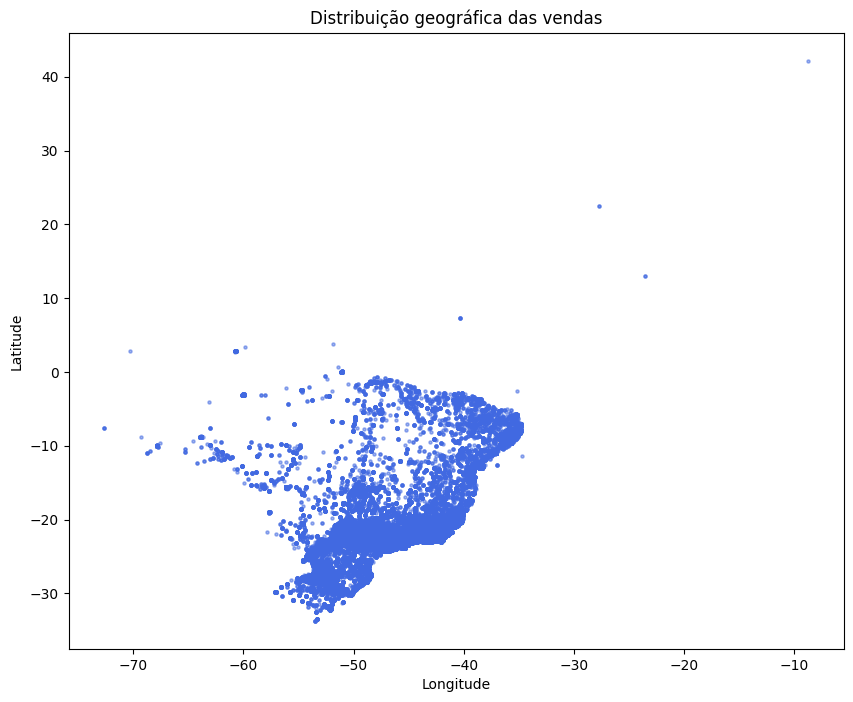

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(df['customer_lng'], df['customer_lat'], 
            s=5, alpha=0.5, color='royalblue')
plt.title('Distribuição geográfica das vendas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [37]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,payment_type_id,review_score,customer_lat,customer_lng,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,1.0,credit_card,1.0,18.12,2.0,4.0,-23.576983,-46.587161,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3.0,voucher,1.0,2.00,5.0,4.0,-23.576983,-46.587161,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2.0,voucher,1.0,18.59,5.0,4.0,-23.576983,-46.587161,-23.680729,-46.444238
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,1.0,boleto,1.0,141.46,1.0,4.0,-12.177924,-44.660711,-19.807681,-43.980427
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,1.0,credit_card,3.0,179.12,2.0,5.0,-16.745150,-48.514783,-21.363502,-48.229601


In [38]:
df.drop(columns=['order_status', 'customer_city', 'customer_state', 'seller_city', 'seller_state', 'order_id', 'order_item_id',
                 'order_estimated_delivery_date', 'order_approved_at', 'order_delivered_carrier_date', 'shipping_limit_date',
                 'order_delivered_customer_date','product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
                 'product_height_cm', 'product_width_cm','product_length_cm','product_weight_g','price','customer_id', 'customer_unique_id',
                 'product_id', 'seller_id','product_category_name','payment_type', 'payment_sequential', 'payment_installments','order_purchase_timestamp'], inplace=True)
df.head()

,freight_value,product_category_id,customer_zip_code_prefix,seller_zip_code_prefix,payment_value,payment_type_id,review_score,customer_lat,customer_lng,seller_lat,seller_lng
0,8.72,74,3149,9350,18.12,2.0,4.0,-23.576983,-46.587161,-23.680729,-46.444238
1,8.72,74,3149,9350,2.00,5.0,4.0,-23.576983,-46.587161,-23.680729,-46.444238
2,8.72,74,3149,9350,18.59,5.0,4.0,-23.576983,-46.587161,-23.680729,-46.444238
3,22.76,63,47813,31570,141.46,1.0,4.0,-12.177924,-44.660711,-19.807681,-43.980427
4,19.22,9,75265,14840,179.12,2.0,5.0,-16.745150,-48.514783,-21.363502,-48.229601


In [42]:
# df = pd.get_dummies(df, columns=['payment_type'], prefix='pay', drop_first=False)

# for col in df.columns:
#     if col.startswith('pay_'):
#         df[col] = df[col].astype(int)
# df.head()

In [39]:
# df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
# df['purchase_year'] = df['order_purchase_timestamp'].dt.year
# df['purchase_month'] = df['order_purchase_timestamp'].dt.month
# df['purchase_dayofweek'] = df['order_purchase_timestamp'].dt.dayofweek
# df.drop(columns=['order_purchase_timestamp'], inplace=True)
# df.head()

In [40]:
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(int)
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(int)


In [41]:
df.dtypes

freight_value               float64
product_category_id           int64
customer_zip_code_prefix      int64
seller_zip_code_prefix        int64
payment_value               float64
payment_type_id             float64
review_score                float64
customer_lat                float64
customer_lng                float64
seller_lat                  float64
seller_lng                  float64
dtype: object

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Copiar o dataset original (boa prática)
df_scaled = df.copy()

# Instancia o scaler
scaler = MinMaxScaler()

# Seleciona apenas colunas numéricas
numeric_cols = [
    c for c in df_scaled.select_dtypes(include=['int64', 'float64']).columns
    if 'lat' not in c and 'lng' not in c
]

# Aplica o scaler
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Confere resultado
print("Colunas normalizadas:", list(numeric_cols))
print(df_scaled.head())



Colunas normalizadas: ['freight_value', 'product_category_id', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 'payment_value', 'payment_type_id', 'review_score']
   freight_value  product_category_id  customer_zip_code_prefix  \
0       0.021285             1.000000                  0.021682   
1       0.021285             1.000000                  0.021682   
2       0.021285             1.000000                  0.021682   
3       0.055556             0.849315                  0.472938   
4       0.046915             0.109589                  0.750296   

   seller_zip_code_prefix  payment_value  payment_type_id  review_score  \
0                0.084565       0.001326             0.25          0.75   
1                0.084565       0.000146             1.00          0.75   
2                0.084565       0.001361             1.00          0.75   
3                0.309625       0.010353             0.00          0.75   
4                0.140172       0.013109             

In [ ]:
import os

# Caminho base onde os arquivos serão salvos
OUTPUT_DIR = "/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetProcessed/OlistDatasets/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Caminhos de saída
NUMERIC_FILE = os.path.join(OUTPUT_DIR, "olist_dataset_numeric.csv")
NORMALIZED_FILE = os.path.join(OUTPUT_DIR, "olist_dataset_normalized.csv")

# 1️⃣ Salvar o dataset numérico (sem normalizar)
df.to_csv(NUMERIC_FILE, index=False)

# 2️⃣ Salvar o dataset normalizado
df_scaled.to_csv(NORMALIZED_FILE, index=False)

print(" Arquivos salvos com sucesso:")
print(f"- Dataset numérico original: {NUMERIC_FILE}")
print(f"- Dataset normalizado (0–1): {NORMALIZED_FILE}")

import joblib
SCALER_FILE = os.path.join(OUTPUT_DIR, "minmax_scaler.pkl")
joblib.dump(scaler, SCALER_FILE)
print(f"⚙️ Scaler salvo em: {SCALER_FILE}")



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, '..', 'src'))
sys.path.append(src_path)
from dbscan import DBSCAN
from kmeans import KMeans
from kmedoids import KMedoids
from wardmethod import WardMethod
from expectationmaximization import ExpectationMaximization
from evaluationmetrics import EvaluationMetrics



# Caminho para o dataset normalizado
FILE_PATH = "/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/data/DatasetProcessed/OlistDatasets/olist_dataset_normalized.csv"

# 1️⃣ Ler dataset
df = pd.read_csv(FILE_PATH)
print(f"Dataset carregado: {df.shape[0]} linhas e {df.shape[1]} colunas")
df.head()



Dataset carregado: 115010 linhas e 11 colunas


,freight_value,product_category_id,customer_zip_code_prefix,seller_zip_code_prefix,payment_value,payment_type_id,review_score,customer_lat,customer_lng,seller_lat,seller_lng
0,0.021285,1.000000,0.021682,0.084565,0.001326,0.25,0.75,-23.576983,-46.587161,-23.680729,-46.444238
1,0.021285,1.000000,0.021682,0.084565,0.000146,1.00,0.75,-23.576983,-46.587161,-23.680729,-46.444238
2,0.021285,1.000000,0.021682,0.084565,0.001361,1.00,0.75,-23.576983,-46.587161,-23.680729,-46.444238
3,0.055556,0.849315,0.472938,0.309625,0.010353,0.00,0.75,-12.177924,-44.660711,-19.807681,-43.980427
4,0.046915,0.109589,0.750296,0.140172,0.013109,0.25,1.00,-16.745150,-48.514783,-21.363502,-48.229601


In [5]:
df.drop(columns=[ 'customer_zip_code_prefix', 'seller_zip_code_prefix', 'review_score'], inplace=True)

In [6]:
df.columns

Index(['freight_value', 'product_category_id', 'payment_value',
       'payment_type_id', 'customer_lat', 'customer_lng', 'seller_lat',
       'seller_lng'],
      dtype='object')

In [7]:
# Dropar linhas onde latitude ou longitude do consumidor estão ausentes
df = df.dropna(subset=['customer_lat', 'customer_lng','payment_value']).reset_index(drop=True)

In [8]:
df.columns

Index(['freight_value', 'product_category_id', 'payment_value',
       'payment_type_id', 'customer_lat', 'customer_lng', 'seller_lat',
       'seller_lng'],
      dtype='object')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, '..', 'src'))
sys.path.append(src_path)
from dbscan import DBSCAN
from kmeans import KMeans
from kmedoids import KMedoids
from wardmethod import WardMethod
from expectationmaximization import ExpectationMaximization
from evaluationmetrics import EvaluationMetrics
from plotsconfig import plot_clusters_3d, plot_clusters_2d


# Converter para array NumPy (entrada para os algoritmos)
X = df.values



In [15]:
from sklearn.decomposition import PCA

X_clean = X[~np.isnan(X).any(axis=1)]

print(f"Antes: {X.shape[0]} linhas")
print(f"Depois: {X_clean.shape[0]} linhas (sem NaN)")


X_pca = PCA(n_components=3).fit_transform(X_clean)

Antes: 115007 linhas
Depois: 114751 linhas (sem NaN)


In [ ]:
kmedoids = KMedoids(k=10, random_state=42, metric_name="manhattan_distance")
kmedoids.fit(X_pca)
labels_kmedoids = kmedoids.labels_

In [14]:
dbscan = DBSCAN(eps=10, min_samples=3, metric="entropy_distance")
dbscan.fit(X_pca)
labels_dbscan = dbscan.labels_

In [16]:
evaluator = EvaluationMetrics(X_pca, labels_dbscan)

silhouette_scores = evaluator.silhouette()
print(f"Silhouette score: {silhouette_scores}")

davies_bouldin_scores = evaluator.davies_bouldin()
print(f"Davies-Bouldin index: {davies_bouldin_scores}")
    
calinski_scores = evaluator.calinski_harabasz()
print(f"Calinski-Harabasz index: {calinski_scores}")

Silhouette score: nan
Davies-Bouldin index: nan
Calinski-Harabasz index: nan


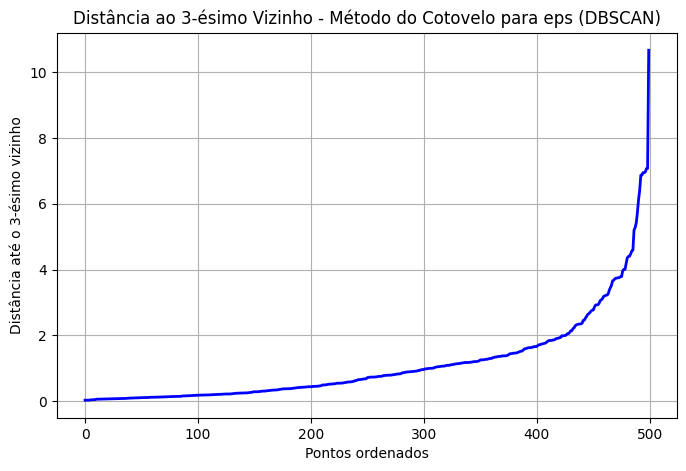

📏 Use o ponto de inflexão (cotovelo) para escolher eps ideal.


In [24]:
dbscan.plot_k_distance(X_pca)

/root/jane-oliveira/tcc-git/clustering-client-segmentation-tcc/src/plotsconfig.py:131: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=cmap(int(label) % max(n_clusters, 1)),


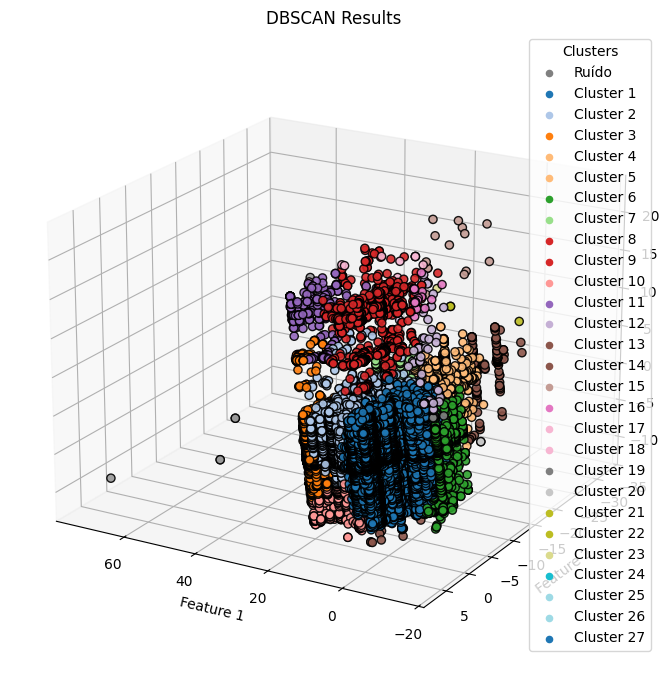

In [10]:
plot_clusters_3d(X_pca, dbscan.labels_, title="DBSCAN Results", pca=False)



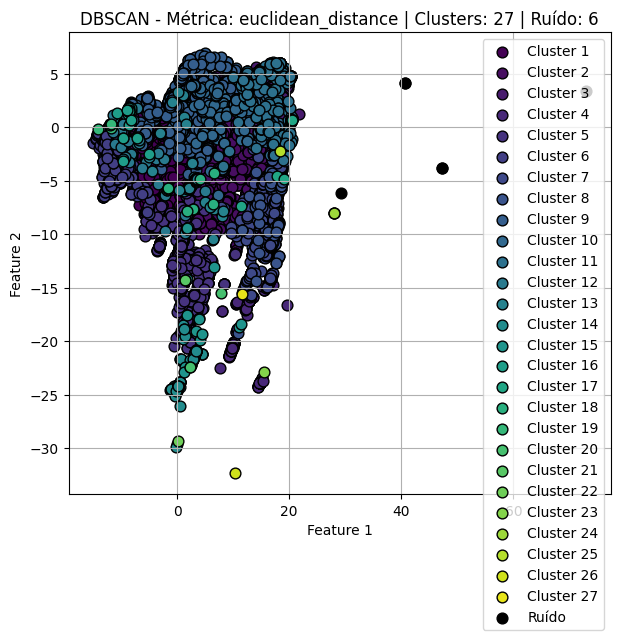

In [11]:
dbscan.plot_clusters(X_pca)

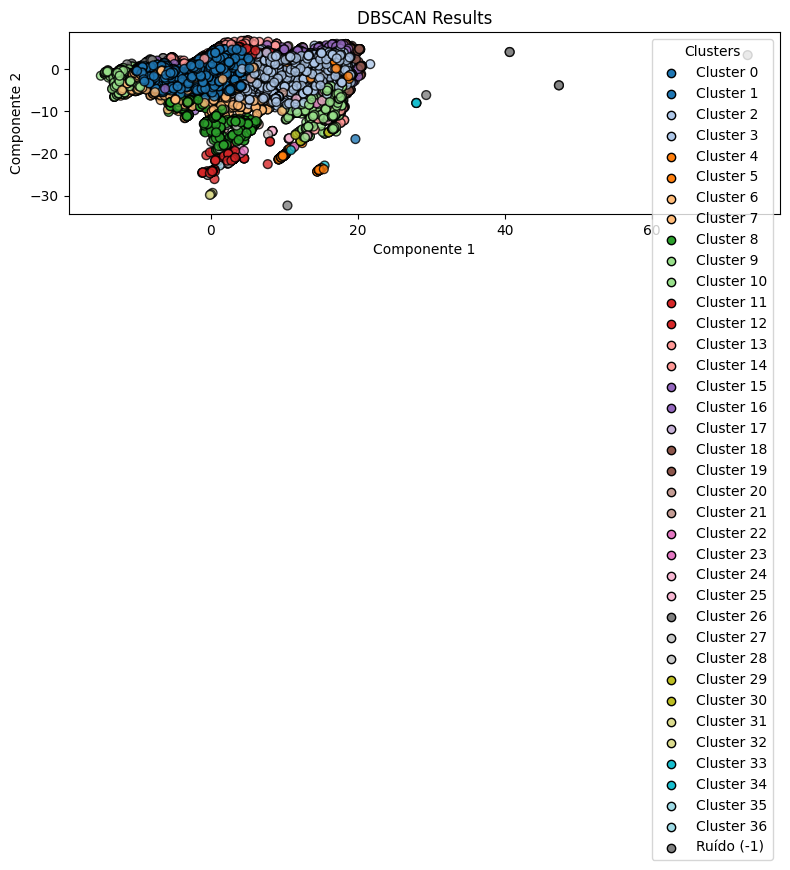

In [ ]:
plot_clusters_2d(X_pca, dbscan.labels_, title="DBSCAN Results")

Calculando métricas para k=4...
Calculando métricas para k=5...
Calculando métricas para k=6...
Calculando métricas para k=7...
Calculando métricas para k=8...
Calculando métricas para k=9...


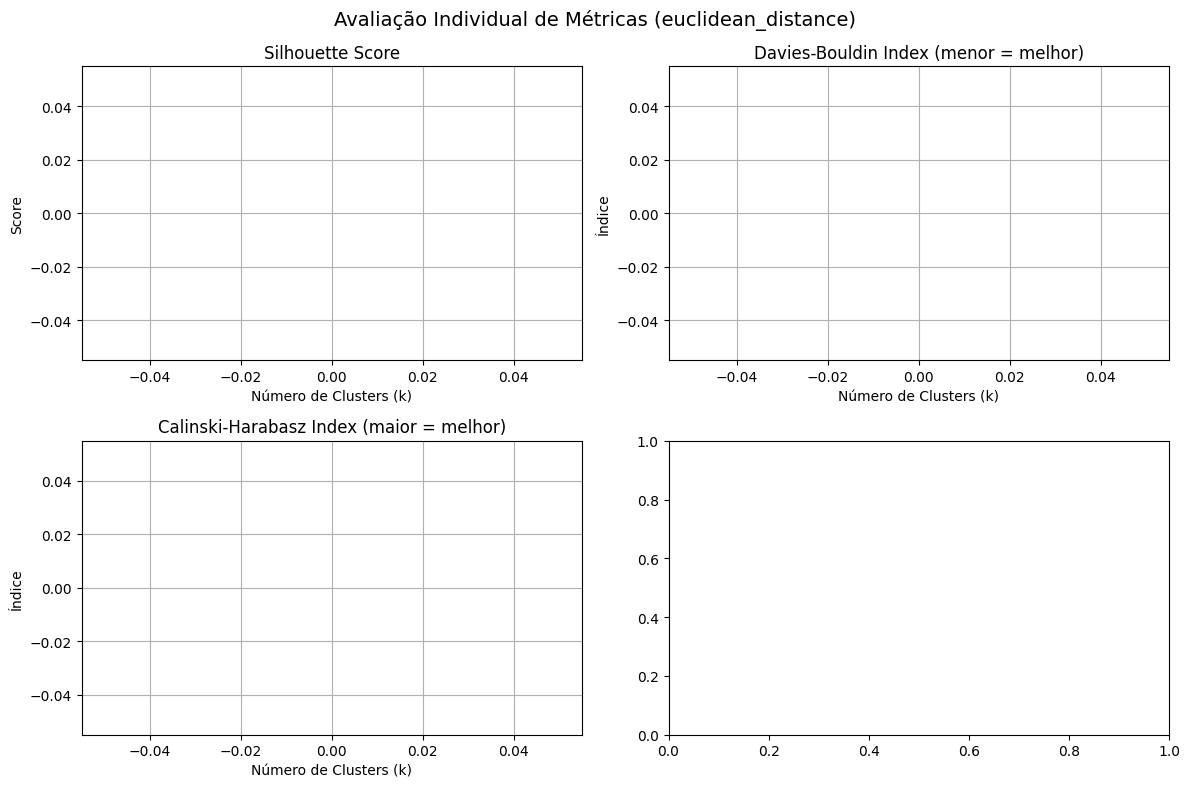

In [ ]:


k_values = range(4, 10)
silhouette_scores, davies_bouldin_scores, calinski_scores, dunn_scores = [], [], [], []
distance_metric = "euclidean_distance"

for k in k_values:
    kmeans = KMeans(k=k, random_state=42, metric_name=distance_metric)
    centroids, labels = kmeans.fit(X)
    evaluator = EvaluationMetrics(X, labels)
    silhouette_scores.append(evaluator.silhouette())
    print(f"Silhouette score para k={k}: {silhouette_scores[-1]}")

    davies_bouldin_scores.append(evaluator.davies_bouldin())
    print(f"Davies-Bouldin index para k={k}: {davies_bouldin_scores[-1]}")
    
    calinski_scores.append(evaluator.calinski_harabasz())
    print(f"Calinski-Harabasz index para k={k}: {calinski_scores[-1]}")




# ---------------- PLOTS INDIVIDUAIS ----------------

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"Avaliação Individual de Métricas ({distance_metric})", fontsize=14)

# Silhouette
axes[0, 0].plot(k_values, silhouette_scores, 'o-', color='darkgreen')
axes[0, 0].set_title("Silhouette Score")
axes[0, 0].set_xlabel("Número de Clusters (k)")
axes[0, 0].set_ylabel("Score")
axes[0, 0].grid(True)

# Davies-Bouldin
axes[0, 1].plot(k_values, davies_bouldin_scores, 's--', color='darkred')
axes[0, 1].set_title("Davies-Bouldin Index (menor = melhor)")
axes[0, 1].set_xlabel("Número de Clusters (k)")
axes[0, 1].set_ylabel("Índice")
axes[0, 1].grid(True)

# Calinski-Harabasz
axes[1, 0].plot(k_values, calinski_scores, '^-', color='steelblue')
axes[1, 0].set_title("Calinski-Harabasz Index (maior = melhor)")
axes[1, 0].set_xlabel("Número de Clusters (k)")
axes[1, 0].set_ylabel("Índice")
axes[1, 0].grid(True)

# Dunn Index
#axes[1, 1].plot(k_values, dunn_scores, 'x-', color='purple')
#axes[1, 1].set_title("Dunn Index (maior = melhor)")
#axes[1, 1].set_xlabel("Número de Clusters (k)")
#axes[1, 1].set_ylabel("Índice")
#axes[1, 1].grid(True)

plt.tight_layout()
plt.show()